# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 199 (delta 93), reused 158 (delta 52), pack-reused 0
Receiving objects: 100% (199/199), 34.12 MiB | 22.31 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

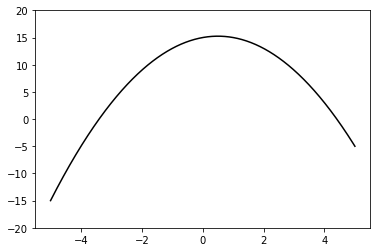

In [4]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])
def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [8]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
X,Y

(array([ 3.98173121, -1.0870395 ,  2.052834  ,  3.49485965,  3.95038967,
         0.79695011, -0.49436893,  4.16941218,  2.93325084, -0.13555798,
         1.3014734 ,  2.31489221, -3.82865707, -1.67463851,  3.15913097,
         1.9767064 , -4.54765932,  0.34197968,  1.80589133,  1.06338418,
         0.75952948,  4.80516651, -4.63607962, -3.15028059, -3.76104836,
         4.36969159, -4.77217424, -2.4008011 , -2.79170729, -3.19682098,
         0.03636505,  4.88235149, -3.0064421 ,  3.38326565,  4.18482062,
         4.66548903, -4.41949056, -1.57687459, -2.49312661, -3.25180516]),
 array([  5.3363829 ,  11.57211717,  12.25265424,   9.8879288 ,
         -0.78862409,  12.54590021,  10.68731465,  -3.86541427,
         11.72348038,  16.20915681,  15.44714319,  10.72216964,
         -2.83062458,  14.01816322,   9.08675297,  13.73415171,
        -14.15375957,  13.26029342,  16.34431147,  15.40667108,
         13.69164923,  -2.06996527,  -6.08123103,   2.61597854,
         -2.02574647,   3.7582

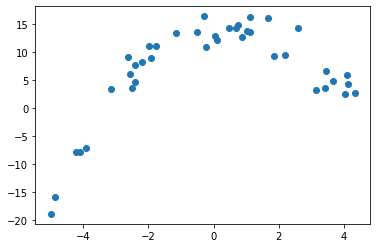

In [6]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [10]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X=X.reshape(-1,1)
    p=PolynomialFeatures(polyDegree, include_bias=False)
    X=p.fit_transform(X)
    return X
X_poly=addPoly(X,200)

In [11]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.98173121e+000 1.58541835e+001 6.31270971e+001 2.51355133e+002
 1.00082858e+003 3.98503039e+003 1.58673199e+004 6.31794029e+004
 2.51563401e+005 1.00165784e+006 3.98833231e+006 1.58804672e+007
 6.32317521e+007 2.51771841e+008 1.00248780e+009 3.99163695e+009
 1.58936255e+010 6.32841446e+010 2.51980454e+011 1.00331844e+012
 3.99494434e+012 1.59067946e+013 6.33365805e+013 2.52189240e+014
 1.00414977e+015 3.99825447e+015 1.59199746e+016 6.33890599e+016
 2.52398198e+017 1.00498178e+018 4.00156734e+018 1.59331656e+019
 6.34415827e+019 2.52607330e+020 1.00581449e+021 4.00488295e+021
 1.59463675e+022 6.34941491e+022 2.52816635e+023 1.00664789e+024
 4.00820132e+024 1.59595803e+025 6.35467590e+025 2.53026114e+026
 1.00748198e+027 4.01152243e+027 1.59728041e+028 6.35994125e+028
 2.53235766e+029 1.00831675e+030 4.01484629e+030 1.59860388e+031
 6.36521097e+031 2.53445592e+032 1.00915222e+033 4.01817291e+033
 1.59992845e+034 6.37048505e+034 2.53655592e+035 1.00998839e+036
 4.02150229e+03

## Splitting data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2, random_state=42)
# train_test_split()

In [16]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [25]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.0009381633251929707
Testing error (rmse): 6286714364.611472


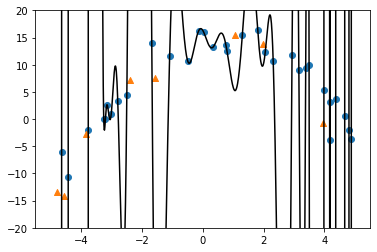

Polynomial coefficients
[16.330775648122653, -9.140974013857429, -58.839616121043235, 156.44994428677037, 254.0485970888489, -570.7302957903628, -335.09777905807204, 741.1363548359153, 178.16176079577968, -450.95644788339797, -42.917660977776706, 148.5962488721469, 4.109847379824499, -28.24478742340992, 0.0946099051326255, 3.070424724875489, -0.040177154087785195, -0.16655453962185318, 0.0004626836167892952, 0.0014720194987714922, 0.00023746817555553586, 0.00020716557226419798, -6.025277725359535e-06, -4.203854517922387e-07, -5.781471543542975e-07, -2.891499642146068e-07, -2.25315986632594e-09, -8.19452539642107e-09, 1.020879782141609e-09, 8.279905342557658e-11, 4.996482535798776e-11, 1.4781589017694194e-11, 7.241344309009342e-13, 6.066313509607523e-13, -4.800111535170753e-14, 1.1900171423065519e-14, -4.193424815014445e-15, -1.4476088097882953e-16, -1.8545695028473024e-16, -2.344476179128906e-17, -5.179036150352043e-18, -1.167353803686752e-18, -4.238854996732249e-20, -3.91921319363594e

In [26]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [62]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(normalize=True, alpha=0.2).fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Training error (rmse): 2.9017535119407127
Testing error (rmse): 4.808085434571241


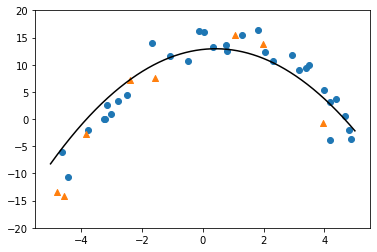

Polynomial coefficients
[12.810194235194825, 0.6069897635023932, -0.720325075733088, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -

In [63]:

display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

0.0
Training error (rmse): 0.5710409939661832
Testing error (rmse): 329747.91789709876


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


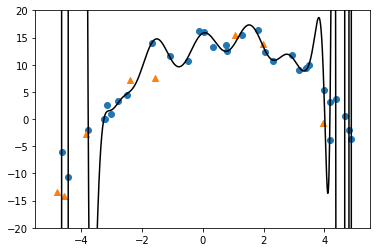

Polynomial coefficients
[15.784408819883538, 2.681285664204478, -19.171337994940245, -1.5890698973766915, 25.237597777698035, 0.2513931854850407, -12.356376949278253, 0.1284371915399921, 2.869346000591432, -0.05253364954871842, -0.3364479431448862, 0.00668330000098473, 0.01730207961776793, -0.00016954970578915885, -1.5312332864257535e-05, -2.106277778708694e-05, -2.1281236682776732e-05, 3.365007259139796e-07, -3.564273332179454e-07, 5.906889853251976e-08, 1.6901367158056012e-08, 1.7383412704339397e-09, 1.1128368706164098e-09, -3.2541052541619174e-11, 2.7783149365588274e-11, -5.3324966464549545e-12, -6.494026169061365e-14, -2.730957414340979e-13, -3.844650105529778e-14, -8.218496887064197e-15, -1.991886871751092e-15, -7.292638979861986e-17, -6.279961387258688e-17, 9.242128642683044e-18, -1.0989519311931963e-18, 7.824502839599416e-19, 1.3865532720016604e-20, 4.089729840843588e-20, 2.1263872440176084e-21, 1.6841653774668102e-21, 1.0442801528213582e-22, 5.68428437711868e-23, 3.268946035324

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


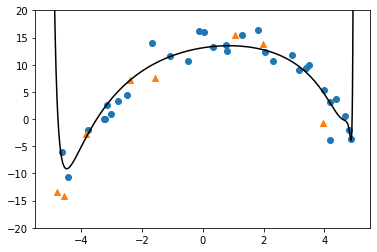

Polynomial coefficients
[13.113176922079155, 0.8942595969080686, -0.5281358202247972, 0.021859011080846803, -0.013021634375222534, 0.00023265129642156243, -0.00031165512602568987, -4.711065278483263e-06, -6.9855251736651724e-06, -3.874475741247331e-07, -1.212063514755129e-07, -1.600677163455792e-08, 5.3461013211459636e-11, -5.490966096795836e-10, 1.5781399700837233e-10, -1.7820767143350687e-11, 1.1227287571057426e-11, -5.983944772846538e-13, 6.005571291333127e-13, -2.2339210715997196e-14, 2.8514920264617364e-14, -9.479714727773803e-16, 1.2664797888954786e-15, -4.411943415048613e-17, 5.3872790151805715e-17, -2.136911540994388e-18, 2.2227813842091386e-18, -1.0386461314541001e-19, 8.963646494147697e-20, -4.978666070308793e-21, 3.550202237180126e-21, -2.3395513049742007e-22, 1.3855328562570408e-22, -1.077126629893632e-23, 5.339937048335282e-24, -4.866143596761513e-25, 2.035429400658286e-25, -2.161948785882165e-26, 7.680462020138937e-27, -9.467320356609428e-28, 2.8704718023094316e-28, -4.09

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


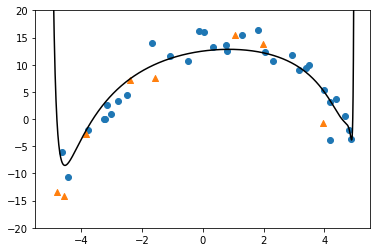

Polynomial coefficients
[12.507684855613828, 0.7580204571941306, -0.4503576184353352, 0.01943547047837423, -0.011630091241236498, 0.0002844792298310912, -0.0002954622241594506, -2.007518176823659e-07, -7.252802948393383e-06, -2.1243076496807244e-07, -1.5721221837487975e-07, -1.1016575432978623e-08, -2.1831137579388273e-09, -4.425892932250735e-10, 4.273257952557574e-11, -1.6631000444601004e-11, 5.835513735900168e-12, -6.303187145578155e-13, 3.6266878898846765e-13, -2.4991297841443138e-14, 1.846378311303215e-14, -1.0451769231276498e-15, 8.557061003358791e-16, -4.559361857959775e-17, 3.7528446093317814e-17, -2.0375336735845504e-18, 1.5868317709213704e-18, -9.182949920062975e-20, 6.53674148377106e-20, -4.130907120861684e-21, 2.64014598941474e-21, -1.8443706561287101e-22, 1.0498848150542113e-22, -8.152907894721947e-24, 4.122223176837808e-24, -3.565793235448442e-25, 1.6012173398923116e-25, -1.543534413677893e-26, 6.1615845982947394e-27, -6.618028600412986e-28, 2.351065065480864e-28, -2.81322

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


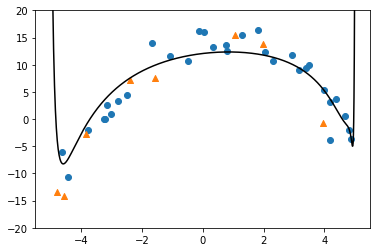

Polynomial coefficients
[12.065481893575468, 0.6631293912663289, -0.39666951723449556, 0.017554812120711402, -0.010566947538351745, 0.00029311157418327214, -0.00027994382831808475, 1.8147805080444394e-06, -7.315191300637102e-06, -1.1483862302328952e-07, -1.7885062855413697e-07, -7.3968860518626785e-09, -3.6243407802777727e-09, -3.210800480501239e-10, -3.24985432813039e-11, -1.2631249292540752e-11, 2.3027549711762155e-12, -4.927135843561177e-13, 2.066589853150582e-13, -1.9804412287939856e-14, 1.1852417747101378e-14, -8.28681971244449e-16, 5.838357471047671e-16, -3.584808048460704e-17, 2.6605630483606125e-17, -1.5819469819449264e-18, 1.1561475523985438e-18, -7.033590264995977e-20, 4.865050163600564e-20, -3.1235877955925724e-21, 2.0000817523803564e-21, -1.3785903375165415e-22, 8.078102080241753e-23, -6.032140916101387e-24, 3.2171676315658415e-24, -2.6146704456725035e-25, 1.2666138400615582e-25, -1.1228521830853426e-26, 4.938548010773863e-27, -4.780159403795738e-28, 1.9093844407609978e-28,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


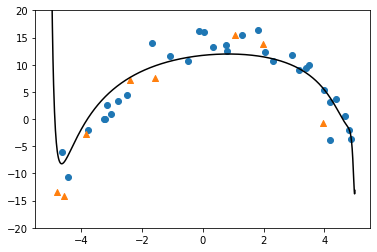

Polynomial coefficients
[11.72188331320966, 0.5915090038953661, -0.3567674556180296, 0.016048283355198357, -0.00973796481982626, 0.0002913673364432538, -0.00026643191043486256, 3.02354690750597e-06, -7.285565432079356e-06, -4.750817690250378e-08, -1.9209953289446169e-07, -4.6067689361968085e-09, -4.586142208677391e-09, -2.1571138876418124e-10, -8.408779317349288e-11, -8.722346209760552e-12, -1.52647858252942e-13, -3.445405722777444e-13, 9.722645005793243e-14, -1.3957170685281628e-14, 7.177557557389587e-15, -5.879812755464247e-16, 3.900304171127874e-16, -2.5603078782543443e-17, 1.8750446474595716e-17, -1.1367007612376178e-18, 8.433814119976747e-19, -5.0798865473309316e-20, 3.637716209621144e-20, -2.264966718336127e-21, 1.5243520457392516e-21, -1.0024996671951542e-22, 6.25383299254406e-23, -4.394591498325812e-24, 2.524371429116865e-24, -1.9066982592065629e-25, 1.0058819901322624e-25, -8.190080713781591e-27, 3.965817174142921e-27, -3.4853592352067673e-28, 1.54963031336349e-28, -1.47079690

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


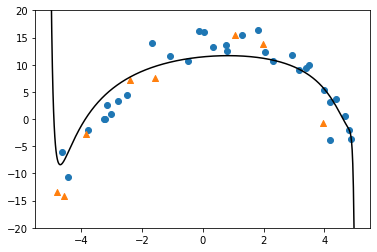

Polynomial coefficients
[11.443390590693848, 0.5351186762358375, -0.3256780549641288, 0.014819670767052486, -0.009070166520097567, 0.0002864324006618613, -0.0002546892578965457, 3.841309383369966e-06, -7.210761133244673e-06, 2.5605110714632845e-09, -2.003378116770194e-07, -2.4082422902318943e-09, -5.2521917644780575e-09, -1.2840066905808536e-10, -1.2097747093871292e-10, -5.344140683592467e-12, -1.9368502783027104e-12, -2.1281431052350026e-13, 1.6861891979268723e-14, -8.7048163094934e-15, 3.715394075480312e-15, -3.732500994388278e-16, 2.4540101968877763e-16, -1.6638986695848744e-17, 1.2844516312669195e-17, -7.571501913941986e-19, 6.06423237431902e-19, -3.460546688309228e-20, 2.7003548363995146e-20, -1.572378868534315e-21, 1.157881522760763e-21, -7.065970795454237e-23, 4.835404432512493e-23, -3.134437749583994e-24, 1.9801997824128024e-24, -1.3723829351256987e-25, 7.987790873248658e-26, -5.9355297064742304e-27, 3.183483088594695e-27, -2.5387259606349453e-28, 1.2562162683252831e-28, -1.075

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


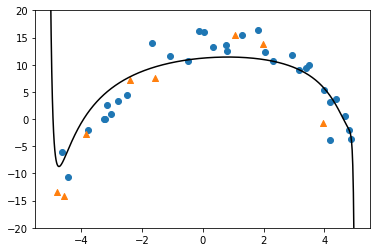

Polynomial coefficients
[11.210655102856467, 0.48942605465579275, -0.30062100153485466, 0.013799867937425946, -0.008517425864984052, 0.0002805003389256636, -0.0002443823143792589, 4.428454512808492e-06, -7.112814935979735e-06, 4.11734382401346e-08, -2.0540782961843016e-07, -6.518766296741089e-10, -5.725197671725386e-09, -5.677116413800782e-11, -1.4816304660657048e-10, -2.5174257524743263e-12, -3.2753022162089366e-12, -1.0130407345568704e-13, -4.41068563619457e-14, -4.2460962810696914e-15, 1.0664809263982687e-15, -1.91897218416269e-16, 1.3394621580725761e-16, -9.150475290080347e-18, 8.263040449457962e-18, -4.445698244609975e-19, 4.2141885728987947e-19, -2.1475845766658894e-20, 1.9637594669833384e-20, -1.0195128964674622e-21, 8.679737849958102e-22, -4.738598527367505e-23, 3.705429493320263e-23, -2.1567361262980213e-24, 1.543453458430879e-24, -9.62949518228792e-26, 6.312255281534316e-26, -4.227200977632914e-27, 2.5450253530836482e-27, -1.8286560172774004e-28, 1.0144713826053995e-28, -7.81

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


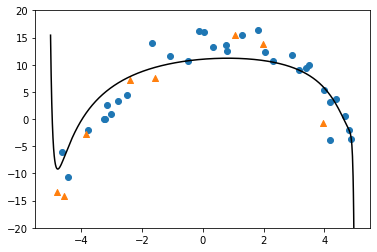

Polynomial coefficients
[11.0116052442651, 0.4515850698359672, -0.27990044493077226, 0.012939460383800384, -0.008049867401815078, 0.0002743524262800996, -0.00023523395008593682, 4.86371189414042e-06, -7.0031058217791235e-06, 7.159612513562046e-08, -2.0838049799902496e-07, 7.660319450592344e-10, -6.0662323784166765e-09, 1.9861229025971457e-12, -1.6863255052601566e-10, -1.7406001560935746e-13, -4.303102893243027e-12, -8.372484860527275e-15, -9.148612628923774e-14, -5.298455238023922e-16, -1.0097560982485499e-15, -4.1394472711586246e-17, 4.5977386032057496e-17, -2.982448876971673e-18, 4.624780168483175e-18, -1.8952933791697737e-19, 2.736613958564815e-19, -1.0872874989714931e-20, 1.3721916547997888e-20, -5.77659387988744e-22, 6.338509381636466e-22, -2.897161496409195e-23, 2.7877019556702096e-23, -1.3904719121698695e-24, 1.1866487036742194e-24, -6.448788782960364e-26, 4.934899184808968e-26, -2.9108542609622124e-27, 2.016713743207801e-27, -1.285611947671399e-28, 8.130074279665511e-29, -5.578

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


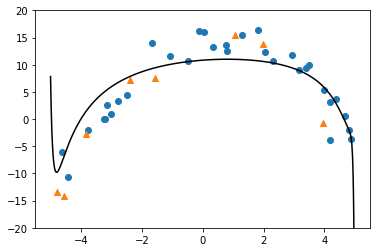

Polynomial coefficients
[10.838261593817737, 0.4196928369820444, -0.26241587009386613, 0.012202878175616803, -0.0076473607319383395, 0.0002682863923932698, -0.0002270301894740271, 5.191931605364495e-06, -6.887901106780564e-06, 9.590351145199291e-08, -2.0991561602669898e-07, 1.9203360291466183e-09, -6.313723882875411e-09, 5.032644391092655e-11, -1.8428026403003475e-10, 1.765500859047713e-12, -5.10623832747654e-12, 6.871798801804977e-14, -1.2898402343477084e-13, 2.549485645858228e-15, -2.667568709502447e-15, 8.283345971042945e-17, -2.474917236137952e-17, 2.079258354880973e-18, 1.6824741901304627e-18, 1.8310094693341183e-20, 1.5353648914728277e-19, -2.2969122757437294e-21, 8.888596097409751e-21, -2.22983465284874e-22, 4.416366013703364e-22, -1.429966193867635e-23, 2.0306022330065623e-23, -7.842534160455043e-25, 8.908445061995353e-25, -3.949238042778342e-26, 3.78720653307191e-26, -1.882909495991661e-27, 1.5741477722969145e-27, -8.640479783342617e-29, 6.432894447815098e-29, -3.8545531306218

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


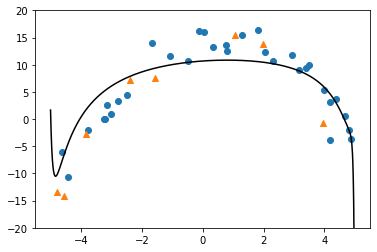

Polynomial coefficients
[10.685106340228778, 0.392421177699806, -0.24741856452609826, 0.011564146938191156, -0.007295836147834388, 0.00026241467332414767, -0.0002196071962180646, 5.441287584320139e-06, -6.770807987095678e-06, 1.1551137497608612e-07, -2.104393324840079e-07, 2.8663593474837933e-09, -6.492995308825667e-09, 9.02428300759469e-11, -1.9636435706910084e-10, 3.372654918950817e-12, -5.742082138227518e-12, 1.3263246003869626e-13, -1.590841532876317e-13, 5.097946431099575e-15, -4.010680471131902e-15, 1.8527604371098365e-16, -8.245100608589596e-17, 6.233212260121202e-18, -7.317935787911344e-19, 1.8793259604371104e-19, 5.447377851518705e-20, 4.661196125685756e-21, 4.884336740713138e-21, 6.308734374513351e-23, 2.816942416997833e-22, -2.5340305635102857e-24, 1.3979152694343687e-23, -3.0082661434200427e-25, 6.425908082500123e-25, -1.96660916454638e-26, 2.819814905419186e-26, -1.0716992223683256e-27, 1.1994358588187284e-27, -5.329822920038856e-29, 4.989207063075115e-29, -2.5069087598224

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


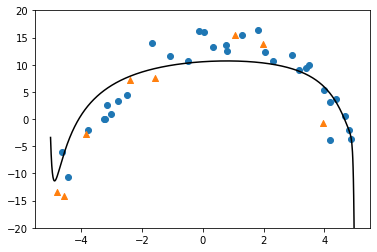

Polynomial coefficients
[10.54818275802415, 0.36881237581765586, -0.23437969394024663, 0.011003979645930691, -0.0069851442821214265, 0.00025677391864862014, -0.00021283845453052622, 5.630708801685183e-06, -6.653961195279465e-06, 1.3143126774198694e-07, -2.1023753803340367e-07, 3.6457531372925387e-09, -6.621371777738635e-09, 1.2331780063371554e-10, -2.0575250569275095e-10, 4.706925402565187e-12, -6.250389834695807e-12, 1.856689287939844e-13, -1.8351406156958793e-13, 7.20796974309482e-15, -5.1115102441622684e-15, 2.6980239631450893e-16, -1.300847069524669e-16, 9.6462180475705e-18, -2.7362717957789786e-18, 3.266529949109902e-19, -2.81776278918593e-20, 1.0324372138068444e-20, 1.5287789094482103e-21, 2.9480363775896804e-22, 1.4711562649476284e-22, 6.951337437010657e-24, 8.63476474382843e-24, 8.713191457972533e-26, 4.320822765995387e-25, -3.825313883166e-27, 1.9963570526583313e-26, -4.263236396522016e-28, 8.792310972407167e-28, -2.706830697718777e-29, 3.750571634448102e-29, -1.44345718719553

In [71]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)
for i in range(0,11):
  al = 0.1*i
  print(al)
  model_L2_reg = linear_model.Ridge(normalize=True, alpha=al).fit(X_train, y_train)
  display_results(model_L2_reg)

Training error (rmse): 3.71521635804896
Testing error (rmse): 4.76666466390658


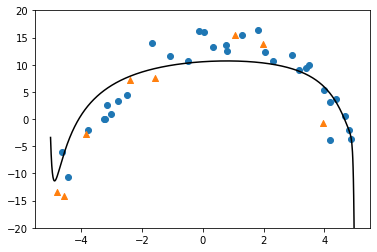

Polynomial coefficients
[10.54818275802415, 0.36881237581765586, -0.23437969394024663, 0.011003979645930691, -0.0069851442821214265, 0.00025677391864862014, -0.00021283845453052622, 5.630708801685183e-06, -6.653961195279465e-06, 1.3143126774198694e-07, -2.1023753803340367e-07, 3.6457531372925387e-09, -6.621371777738635e-09, 1.2331780063371554e-10, -2.0575250569275095e-10, 4.706925402565187e-12, -6.250389834695807e-12, 1.856689287939844e-13, -1.8351406156958793e-13, 7.20796974309482e-15, -5.1115102441622684e-15, 2.6980239631450893e-16, -1.300847069524669e-16, 9.6462180475705e-18, -2.7362717957789786e-18, 3.266529949109902e-19, -2.81776278918593e-20, 1.0324372138068444e-20, 1.5287789094482103e-21, 2.9480363775896804e-22, 1.4711562649476284e-22, 6.951337437010657e-24, 8.63476474382843e-24, 8.713191457972533e-26, 4.320822765995387e-25, -3.825313883166e-27, 1.9963570526583313e-26, -4.263236396522016e-28, 8.792310972407167e-28, -2.706830697718777e-29, 3.750571634448102e-29, -1.44345718719553

Training error (rmse): 6.812482265408189
Testing error (rmse): 10.899779905445456


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


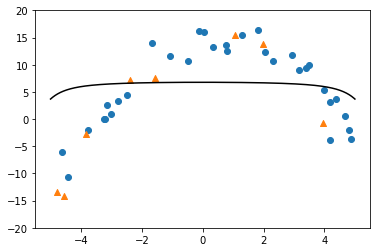

Polynomial coefficients
[6.769011222467543, 0.0, -0.02196698438930232, 0.0, -0.0007865545806748587, 0.0, -2.747367346754364e-05, -0.0, -9.625465830747015e-07, -0.0, -3.347467389809531e-08, -0.0, -1.1400883969312778e-09, -0.0, -3.75138634998998e-11, -0.0, -1.1701029794679817e-12, -0.0, -3.334247269078789e-14, -0.0, -7.870039205539429e-16, -0.0, -9.314026388169352e-18, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 

In [51]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_EL_reg = linear_model.ElasticNet(normalize=True).fit(X_train, y_train)


Training error (rmse): 6.09094662322574
Testing error (rmse): 9.76482688170379


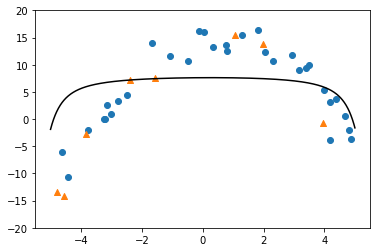

Polynomial coefficients
[7.615317639685243, 0.027214116785481777, -0.050514687769175545, 0.0, -0.0017890727111677792, 0.0, -6.362183451027483e-05, 0.0, -2.300572876169031e-06, 0.0, -8.372245853789824e-08, -0.0, -3.0394951670361758e-09, -0.0, -1.095359725136326e-10, -0.0, -3.906559789594481e-12, -0.0, -1.3751274103852844e-13, -0.0, -4.761027777039019e-15, -0.0, -1.612891261532479e-16, -0.0, -5.301323044360705e-18, -0.0, -1.665746849000478e-19, -0.0, -4.859639551612649e-21, -0.0, -1.2263138191802046e-22, -0.0, -2.0395634463082678e-24, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0,

In [48]:
display_results(model_EL_reg)

## Viewing the predictions in the testing set

In [33]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,1.063384,15.406671,5.237413e+00,6.750224,10.679678
1,-4.547659,-14.153760,2.144398e+08,5.498665,-6.182711
2,1.976706,13.734152,9.812509e+00,6.572475,10.333770
3,-4.772174,-13.371921,-1.778022e+10,5.364713,-10.348619
4,3.950390,-0.788624,-2.855277e+03,5.823591,6.139294
5,-3.828657,-2.830625,-1.222104e+05,5.884213,2.021597
6,-1.576875,7.479890,-4.486357e+01,6.663433,9.291288
7,-2.400801,7.252234,7.403644e+01,6.453629,7.854259
